<a href="https://colab.research.google.com/github/leesa-menezes/Used-Car-Price-Prediction/blob/main/Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [ ]:
data.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [ ]:
data.shape

(54273, 13)

In [ ]:
data.duplicated().sum()

0

In [ ]:
print(data["clean_title"])

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
54268    Yes
54269    Yes
54270    Yes
54271    Yes
54272    Yes
Name: clean_title, Length: 54273, dtype: object


In [ ]:
data["clean_title"].value_counts()

clean_title
Yes    54273
Name: count, dtype: int64

In [ ]:
data["accident"].value_counts()

accident
None reported                             39896
At least 1 accident or damage reported    14377
Name: count, dtype: int64

<Axes: xlabel='clean_title'>

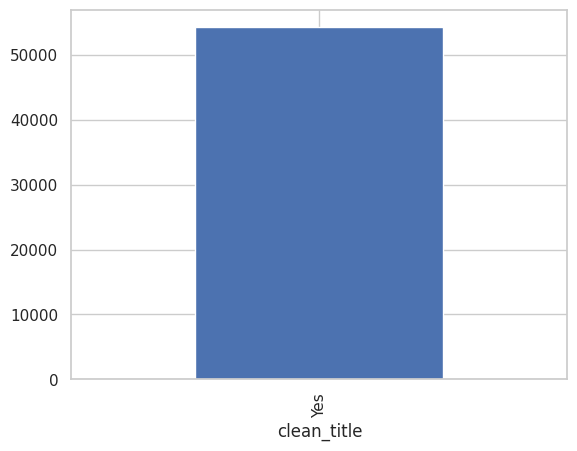

In [ ]:
data["clean_title"].value_counts().plot(kind='bar')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [ ]:
data.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [ ]:
data["fuel_type"].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [ ]:
#replace dash and not supported values in fuel_type with 'Electric'
data['fuel_type'].replace('–', 'Electric', inplace = True)

In [ ]:
#replace not supported in fuel_type with 'Electric'
data['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [ ]:
data["fuel_type"].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [ ]:
#Drop the rows with null values in clean_title and accident column
data.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

In [ ]:
data.shape

(54273, 13)

In [ ]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    engine_type = re.search(r'\d+\.\d+L ([\w\s]+Engine)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else '',\
           engine_type.group(1) if engine_type else ''

# Apply the function to create new columns
data[['Horsepower', 'Engine_Displacement', 'Engine_Type']] = data['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [ ]:
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5L,V6 Cylinder Engine
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0L,Straight 6 Cylinder Engine
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2L,8 Cylinder Engine
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0L,Straight 6 Cylinder Engine
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8L,V6 Cylinder Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000,445.0,4.4L,8 Cylinder Engine
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500,220.0,2.0L,4 Cylinder Engine
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950,420.0,3.6L,V6 Cylinder Engine
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965,None,4.0L,


In [ ]:
data['Horsepower'].isnull().sum()

3684

In [ ]:
data['Horsepower'].dtype

dtype('O')

In [ ]:
#convert dtype of Horsepower to float
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors = 'coerce')
data['Horsepower'].dtype

dtype('float64')

In [ ]:
data["Engine_Type"].value_counts()

Engine_Type
8 Cylinder Engine             16304
V6 Cylinder Engine            15976
4 Cylinder Engine             10433
Straight 6 Cylinder Engine     5106
                               4193
Flat 6 Cylinder Engine         1437
12 Cylinder Engine              334
5 Cylinder Engine               220
10 Cylinder Engine              199
3 Cylinder Engine                71
Name: count, dtype: int64

In [ ]:
data['Engine_Type'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
54268    False
54269    False
54270    False
54271    False
54272    False
Name: Engine_Type, Length: 54273, dtype: bool

In [ ]:
filtered_df = data[(data["Engine_Type"] == "")]
filtered_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type
16,16,Tesla,Model 3 Long Range,2021,21600,Gasoline,271.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,138999,271.0,,
20,20,GMC,Terrain SLE,2020,61830,Gasoline,1.5L I4 16V GDI DOHC Turbo,9-Speed Automatic,Summit White,Jet Black,None reported,Yes,26485,NaN,1.5L,
26,26,Ford,Expedition Max XLT,2021,6449,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Black,Mesa,None reported,Yes,89995,NaN,3.5L,
37,37,Mazda,CX-30 Premium Package,2020,25779,Gasoline,2.5L I4 16V,6-Speed Automatic,Platinum Quartz Metallic,Black,At least 1 accident or damage reported,Yes,24995,NaN,2.5L,
58,58,Mazda,Protege DX,1993,75980,Electric,–,A/T,Green,Black,None reported,Yes,90200,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54210,54210,Kia,Sportage Nightfall,2022,26468,Gasoline,2.4L I4 16V GDI DOHC,Automatic,Red,Black,None reported,Yes,27875,NaN,2.4L,
54231,54231,Ford,Expedition Max XLT,2021,10232,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Black,Sandstone,None reported,Yes,57850,NaN,3.5L,
54245,54245,Chrysler,Crossfire Limited,2005,2353,Gasoline,3.2L V6 24V MPFI DOHC,6-Speed Automatic,Metallic,Black,None reported,Yes,38322,NaN,3.2L,
54258,54258,RAM,1500 Longhorn,2019,76249,Gasoline,5.7L V8 16V MPFI OHV,6-Speed Automatic,Diamond Black,Mountain Brown,At least 1 accident or damage reported,Yes,40995,NaN,5.7L,


In [ ]:
#replace not supported in fuel_type with 'Electric'
data['Engine_Type'].replace('', 'Not Mentioned', inplace = True)

In [ ]:
data["Engine_Type"].value_counts()

Engine_Type
8 Cylinder Engine             16304
V6 Cylinder Engine            15976
4 Cylinder Engine             10433
Straight 6 Cylinder Engine     5106
Not Mentioned                  4193
Flat 6 Cylinder Engine         1437
12 Cylinder Engine              334
5 Cylinder Engine               220
10 Cylinder Engine              199
3 Cylinder Engine                71
Name: count, dtype: int64

In [ ]:
#using group by to fill in the values of the horse power with NaN values
data['Horsepower'].fillna(data.groupby('Engine_Type')['Horsepower'].transform("mean"), inplace = True)

In [ ]:
data['Horsepower'].isnull().sum()

0

In [ ]:
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.000000,3.5L,V6 Cylinder Engine
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.000000,3.0L,Straight 6 Cylinder Engine
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.000000,4.2L,8 Cylinder Engine
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.000000,3.0L,Straight 6 Cylinder Engine
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.000000,3.8L,V6 Cylinder Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000,445.000000,4.4L,8 Cylinder Engine
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500,220.000000,2.0L,4 Cylinder Engine
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950,420.000000,3.6L,V6 Cylinder Engine
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965,483.315217,4.0L,Not Mentioned


In [ ]:
#strip the L from Engine_Displacement
data['Engine_Displacement'] = data['Engine_Displacement'].str.replace('L', '')

In [ ]:
#Change the dtype of Engine_Displacement to numeric
data['Engine_Displacement'] = pd.to_numeric(data['Engine_Displacement'], errors = 'coerce')

In [ ]:
data['Engine_Displacement'].isnull().sum()

606

In [ ]:
#using group by to fill in the values of the Engine Displacement with NaN values
data['Engine_Displacement'].fillna(data.groupby('Engine_Type')['Engine_Displacement'].transform("mean"), inplace = True)

In [ ]:
data['Engine_Displacement'].isnull().sum()

0

In [ ]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,V6 Cylinder Engine
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,Straight 6 Cylinder Engine
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8 Cylinder Engine
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,Straight 6 Cylinder Engine
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,200.0,3.8,V6 Cylinder Engine


In [ ]:
data["model_year"].value_counts()

model_year
2018    4888
2016    4693
2017    4042
2019    4014
2020    4012
2021    3781
2015    3715
2022    3140
2014    2941
2013    2452
2011    2106
2012    2101
2023    1794
2008    1741
2007    1584
2010    1508
2009     983
2005     967
2006     865
2004     745
2003     557
2001     461
2002     391
1999     176
2000     152
1998     117
1997      80
1996      76
1995      48
1993      47
2024      42
1994      37
1992      12
1974       5
Name: count, dtype: int64

In [ ]:
#drop engine column
data.drop('engine', axis = 1, inplace = True)

In [ ]:
#subtract the values in model_year from 2023 to get the age of the car
data['age'] = 2024 - data['model_year']

In [ ]:
data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type,age
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,V6 Cylinder Engine,6
1,1,BMW,335 i,2007,80000,Gasoline,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,Straight 6 Cylinder Engine,17
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8 Cylinder Engine,15
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,Straight 6 Cylinder Engine,2
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,A/T,White,Black,None reported,Yes,7850,200.0,3.8,V6 Cylinder Engine,23


In [ ]:
#drop model_year column
data.drop('model_year', axis = 1, inplace = True)

In [ ]:
data["transmission"].value_counts()

transmission
A/T                                                   16757
8-Speed A/T                                            7287
Transmission w/Dual Shift Mode                         6454
6-Speed A/T                                            5944
6-Speed M/T                                            3618
7-Speed A/T                                            3415
10-Speed A/T                                           2187
8-Speed Automatic                                      1189
5-Speed A/T                                            1185
9-Speed A/T                                            1073
4-Speed A/T                                             764
5-Speed M/T                                             718
CVT Transmission                                        692
10-Speed Automatic                                      642
6-Speed Automatic                                       516
Automatic                                               441
M/T                        

In [ ]:
data['price'].describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

In [ ]:
#identify and remove outliers from the data df in relation to price column using IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29500.0


In [ ]:
data.shape

(54273, 15)

In [ ]:
#use IQR value to filter out the outliers
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) |(data['price'] > (Q3 + 0.7 * IQR)))]
data.shape

(47678, 15)

In [ ]:
import pandas as pd

# Calculate quartiles
Q1 = data['price'].quantile(0.25)
Q2 = data['price'].median()
Q3 = data['price'].quantile(0.75)

# Define a function to categorize data points into quartiles
def categorize_quartile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"

# Apply the categorize_quartile function to the 'price' column
data['Quartile'] = data['price'].apply(categorize_quartile)

                                   # Count the number of data points in each quartile
quartile_counts = data['Quartile'].value_counts().reset_index()
quartile_counts.columns = ['Quartile', 'Count']

# Display the quartile distribution table
print(quartile_counts)

    Quartile  Count
0   Q3 (75%)  12028
1   Q2 (50%)  11978
2  Q4 (100%)  11920
3   Q1 (25%)  11752


<ipython-input-169-f7b22abf307e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quartile'] = data['price'].apply(categorize_quartile)


In [ ]:
data.head()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Engine_Type,age,Quartile
0,0,Ford,F-150 Lariat,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,Yes,11000,375.0,3.5,V6 Cylinder Engine,6,Q1 (25%)
1,1,BMW,335 i,80000,Gasoline,6-Speed M/T,Black,Black,None reported,Yes,8250,300.0,3.0,Straight 6 Cylinder Engine,17,Q1 (25%)
2,2,Jaguar,XF Luxury,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,Yes,15000,300.0,4.2,8 Cylinder Engine,15,Q2 (50%)
3,3,BMW,X7 xDrive40i,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,335.0,3.0,Straight 6 Cylinder Engine,2,Q4 (100%)
4,4,Pontiac,Firebird Base,111000,Gasoline,A/T,White,Black,None reported,Yes,7850,200.0,3.8,V6 Cylinder Engine,23,Q1 (25%)


In [ ]:
data['clean_title'].nunique()

1

In [ ]:
#drop clean_title column , accident column and Quartile column
data.drop(['clean_title','accident', 'Quartile'], axis = 1, inplace = True)

<ipython-input-172-fe5260b31399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['clean_title','accident', 'Quartile'], axis = 1, inplace = True)


In [ ]:
#create a group of transmission, fuel_type and price
df_group = data.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
#create a pivot table
df_pivot = df_group.pivot(index = 'transmission', columns = 'fuel_type', values = 'price')
df_pivot

fuel_type,Diesel,E85 Flex Fuel,Electric,Gasoline,Hybrid,Plug-In Hybrid
transmission,,,,,,
1-Speed A/T,33200.000000,NaN,NaN,37159.475000,50700.000000,NaN
1-Speed Automatic,NaN,NaN,NaN,35625.000000,NaN,NaN
10-Speed A/T,47531.641304,37481.684211,NaN,42893.625171,47474.166667,NaN
10-Speed Automatic,41609.800000,NaN,NaN,41205.101167,NaN,NaN
10-Speed Automatic with Overdrive,NaN,NaN,NaN,47604.500000,NaN,NaN
2-Speed A/T,NaN,NaN,NaN,NaN,51000.000000,NaN
4-Speed A/T,8366.666667,11084.193548,14612.600000,11701.653451,8633.333333,NaN
4-Speed Automatic,NaN,39985.000000,NaN,20104.000000,NaN,NaN
5-Speed A/T,23258.520833,10785.714286,12945.666667,15787.475158,18499.666667,NaN


In [ ]:
#fill the null values with mean
df_pivot.fillna(df_pivot.mean(), inplace = True)
df_pivot

fuel_type,Diesel,E85 Flex Fuel,Electric,Gasoline,Hybrid,Plug-In Hybrid
transmission,,,,,,
1-Speed A/T,33200.000000,24171.105932,24385.886376,37159.475000,50700.000000,33147.696999
1-Speed Automatic,36291.772735,24171.105932,24385.886376,35625.000000,32680.197880,33147.696999
10-Speed A/T,47531.641304,37481.684211,24385.886376,42893.625171,47474.166667,33147.696999
10-Speed Automatic,41609.800000,24171.105932,24385.886376,41205.101167,32680.197880,33147.696999
10-Speed Automatic with Overdrive,36291.772735,24171.105932,24385.886376,47604.500000,32680.197880,33147.696999
2-Speed A/T,36291.772735,24171.105932,24385.886376,32535.317844,51000.000000,33147.696999
4-Speed A/T,8366.666667,11084.193548,14612.600000,11701.653451,8633.333333,33147.696999
4-Speed Automatic,36291.772735,39985.000000,24385.886376,20104.000000,32680.197880,33147.696999
5-Speed A/T,23258.520833,10785.714286,12945.666667,15787.475158,18499.666667,33147.696999


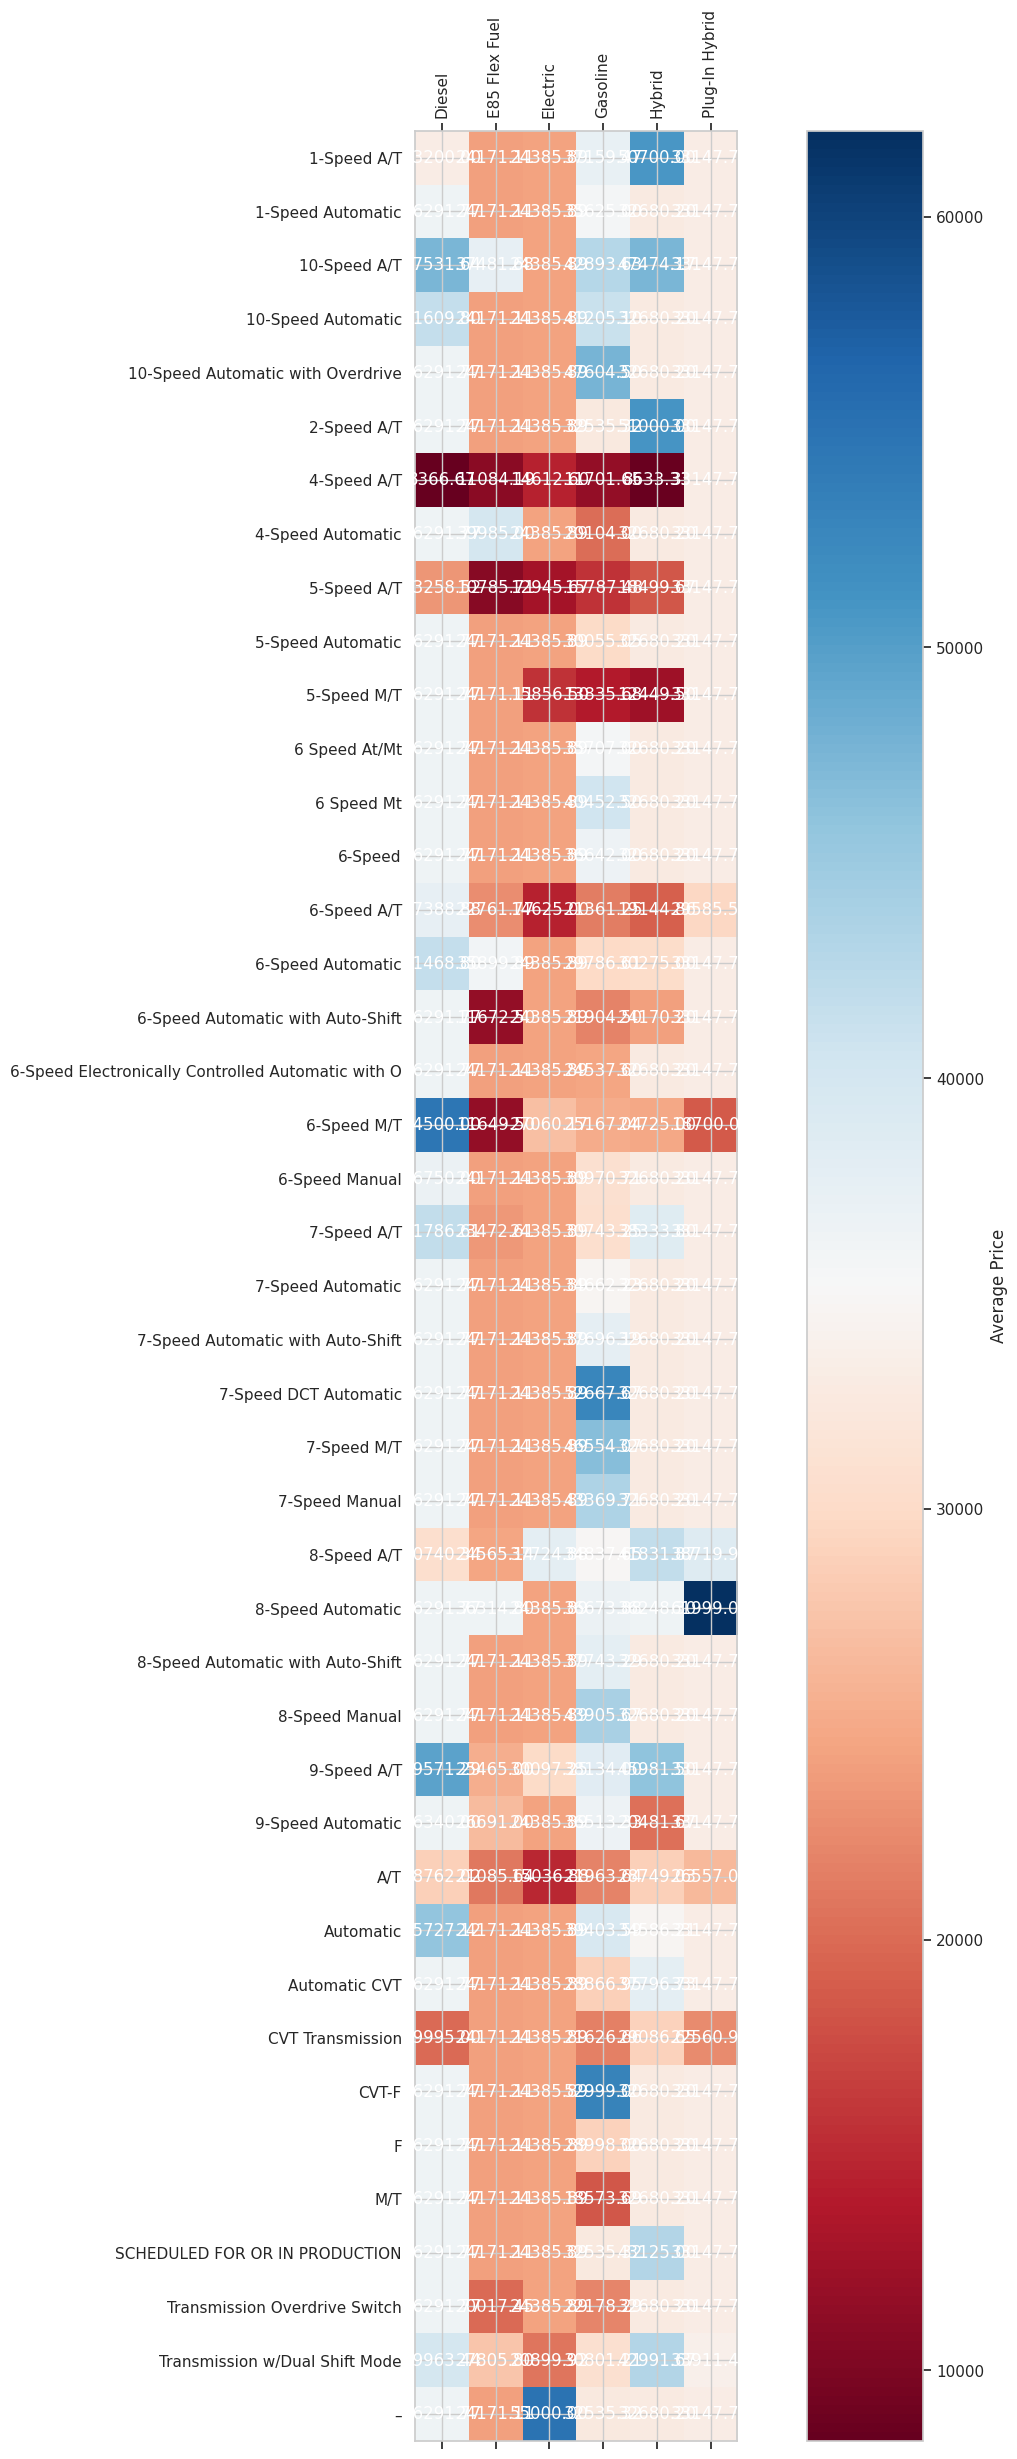

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap
fig, ax = plt.subplots(figsize=(18, 30), dpi=100)
cax = ax.matshow(df_pivot, cmap='RdBu')

# Label names
row_labels = df_pivot.columns
col_labels = df_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]))
ax.set_yticks(np.arange(df_pivot.shape[0]))

# Insert labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

# Rotate label if too long
plt.xticks(rotation=90)

# Add price numbers on each box
for i in range(len(col_labels)):
    for j in range(len(row_labels)):
        text = ax.text(j, i, f'{df_pivot.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.colorbar(cax, label='Average Price')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

In [ ]:
# Encode the categorical data
data['fuel_type_target'] = encoder.fit_transform(data['fuel_type'])
data['transmission_target'] = encoder.fit_transform(data['transmission'])
data['brand_target'] = encoder.fit_transform(data['brand'])
data['Engine_Type_target'] = encoder.fit_transform(data['Engine_Type'])
data['model_target'] = encoder.fit_transform(data['model'])

<ipython-input-177-243e489cdf2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel_type_target'] = encoder.fit_transform(data['fuel_type'])
<ipython-input-177-243e489cdf2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission_target'] = encoder.fit_transform(data['transmission'])
<ipython-input-177-243e489cdf2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
data.head()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,price,Horsepower,Engine_Displacement,Engine_Type,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,0,Ford,F-150 Lariat,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,375.0,3.5,V6 Cylinder Engine,6,3,2,13,9,636
1,1,BMW,335 i,80000,Gasoline,6-Speed M/T,Black,Black,8250,300.0,3.0,Straight 6 Cylinder Engine,17,3,18,4,8,49
2,2,Jaguar,XF Luxury,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,300.0,4.2,8 Cylinder Engine,15,3,14,20,5,1739
3,3,BMW,X7 xDrive40i,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,335.0,3.0,Straight 6 Cylinder Engine,2,4,41,4,8,1716
4,4,Pontiac,Firebird Base,111000,Gasoline,A/T,White,Black,7850,200.0,3.8,V6 Cylinder Engine,23,3,32,38,9,683


In [ ]:
#identify and remove outliers from the data df in relation to price column using IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

22975.5


In [ ]:
#use IQR value to filter out the outliers
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) |(data['price'] > (Q3 + 0.7 * IQR)))]
data.shape

(44457, 18)

Random Forest Algo

In [ ]:
y = data['price'] #DEPENDENT VARIABLE AND TARGET
x = data.drop(columns= ['id','brand','model','fuel_type','transmission','Engine_Type','price','ext_col','int_col']) # INPUT AND INDEPENDENT DATA

In [ ]:
y

0        11000
1         8250
2        15000
4         7850
5         4995
         ...  
54267    32500
54268    29000
54269     6500
54270    18950
54272    37499
Name: price, Length: 44457, dtype: int64

In [ ]:
x

,milage,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,74349,375.0,3.5,6,3,2,13,9,636
1,80000,300.0,3.0,17,3,18,4,8,49
2,91491,300.0,4.2,15,3,14,20,5,1739
4,111000,200.0,3.8,23,3,32,38,9,683
5,124756,140.0,1.8,21,3,10,0,3,863
...,...,...,...,...,...,...,...,...,...
54267,69000,395.0,3.0,4,4,41,24,8,1343
54268,29000,445.0,4.4,7,3,26,4,5,1713
54269,94634,220.0,2.0,9,1,14,3,3,164
54270,40989,420.0,3.6,11,3,41,39,9,416


In [ ]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model_Ereg = ExtraTreesRegressor()
model_Ereg.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model_Ereg.feature_importances_)

[0.33542116 0.11455782 0.03855026 0.34570748 0.00955042 0.0480056
 0.03017071 0.02286641 0.05517014]


In [ ]:
x.shape

(44457, 9)

In [ ]:
x.head()

,milage,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,74349,375.0,3.5,6,3,2,13,9,636
1,80000,300.0,3.0,17,3,18,4,8,49
2,91491,300.0,4.2,15,3,14,20,5,1739
4,111000,200.0,3.8,23,3,32,38,9,683
5,124756,140.0,1.8,21,3,10,0,3,863


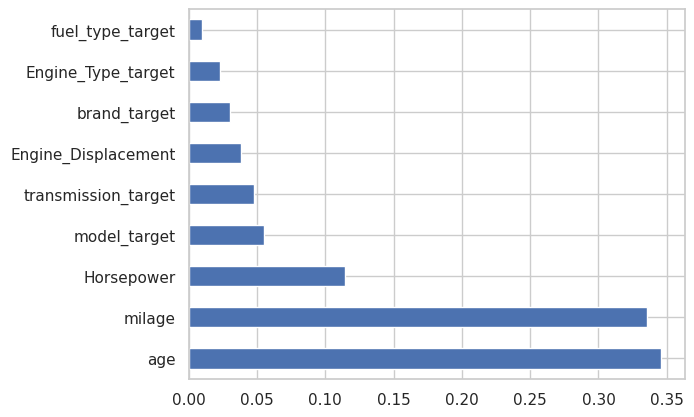

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_Ereg.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [ ]:
 x = x.drop(columns= ['fuel_type_target','Engine_Type_target','brand_target']) # INPUT AND INDEPENDENT DATA

In [ ]:
x.head()

,milage,Horsepower,Engine_Displacement,age,transmission_target,model_target
0,74349,375.0,3.5,6,2,636
1,80000,300.0,3.0,17,18,49
2,91491,300.0,4.2,15,14,1739
4,111000,200.0,3.8,23,32,683
5,124756,140.0,1.8,21,10,863


In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y, test_size=0.20, random_state=150)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x,y, test_size=0.20, random_state=150)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = StandardScaler()  # Or StandardScaler() for standardization
x_train_1 = scaler.fit_transform(x_train_1)
x_test_1 = scaler.fit_transform(x_test_1)

In [ ]:
lr = LinearRegression()
lr.fit(x_train_1,y_train_1)

rf = RandomForestRegressor()
rf.fit(x_train_1,y_train_1)

xgb = (GradientBoostingRegressor(n_estimators=650,max_depth = 3, learning_rate=0.05, random_state=150,max_features=3))
xgb.fit(x_train_1,y_train_1)

xg = XGBRegressor(n_estimators=300, max_depth = 3, learning_rate=0.05, random_state=150)
xg.fit(x_train_1,y_train_1)

svr = SVR(kernel='poly')
svr.fit(x_train_2, y_train_2)

<ipython-input-374-b4c79ad73dcc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_1,y_train_1)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [ ]:
y_pred1 = lr.predict(x_test_1)
y_pred2 = rf.predict(x_test_1)
y_pred3 = xgb.predict(x_test_1)
y_pred4 = xg.predict(x_test_1)
y_pred5 = svr.predict(x_test_2)

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test_1,y_pred1)
score2 = metrics.r2_score(y_test_1,y_pred2)
score3 = metrics.r2_score(y_test_1,y_pred3)
score4 = metrics.r2_score(y_test_1,y_pred4)
score5 = metrics.r2_score(y_test_2,y_pred5)

In [ ]:
print(score1,score2,score3,score4,score5)

0.5732566807150467 0.6223387409222413 0.6488149895967752 0.644406691601543 0.10200564329814821


In [ ]:
#define Z as the input
Z = data[['transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement','model_target']]
Z.head()


,transmission_target,age,milage,Horsepower,Engine_Displacement,model_target
0,2,6,74349,375.0,3.5,636
1,18,17,80000,300.0,3.0,49
2,14,15,91491,300.0,4.2,1739
4,32,23,111000,200.0,3.8,683
5,10,21,124756,140.0,1.8,863


In [ ]:
Z.shape

(44457, 6)

In [ ]:
y = data[['price']]
y.head()

,price
0,11000
1,8250
2,15000
4,7850
5,4995


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
#fit transform Z
Z_pr = pr.fit_transform(Z)
Z_pr.shape

(44457, 28)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#create a linear regression model object for polynomial regression
poly_lr = LinearRegression()
poly_lr

LinearRegression()

In [ ]:
#fit the polynomial model
poly_lr.fit(Z_pr, y)

LinearRegression()

In [ ]:
#import standard scaler and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#create a list of tuples - each containing a model/estimator and its constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
#pipe line object
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z_pr,y, test_size=0.2, random_state=150)

In [ ]:
x_train

array([[1.000000e+00, 1.400000e+01, 6.000000e+00, ..., 2.809000e+01,
        7.764500e+03, 2.146225e+06],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, ..., 1.225000e+01,
        2.191000e+03, 3.918760e+05],
       [1.000000e+00, 2.000000e+01, 1.100000e+01, ..., 2.500000e+01,
        3.405000e+03, 4.637610e+05],
       ...,
       [1.000000e+00, 2.600000e+01, 8.000000e+00, ..., 9.000000e+00,
        2.250000e+02, 5.625000e+03],
       [1.000000e+00, 3.200000e+01, 1.200000e+01, ..., 1.225000e+01,
        1.855000e+03, 2.809000e+05],
       [1.000000e+00, 3.200000e+01, 1.900000e+01, ..., 2.500000e+01,
        2.685000e+03, 2.883690e+05]])

In [ ]:
#fit the pipeline object
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#Make predictions using the pipeline object
ypipe2=pipe.predict(x_test)
ypipe2[0:4]

array([[39502.8125  ],
       [13099.5625  ],
       [28698.796875],
       [23763.71875 ]])

In [ ]:
ypipe2_train = pipe.predict(x_train)

In [ ]:
ypipe2_test = pipe.predict(x_test)

In [ ]:
pipe.score(x_test, y_test)

0.6402776047288677

In [ ]:
pipe.score(x_train, y_train)

0.6451556733399233

In [ ]:
import seaborn as sns


#Function for Distribution plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    sns.kdeplot(RedFunction, label=RedName)
    sns.kdeplot(BlueFunction,label=BlueName)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

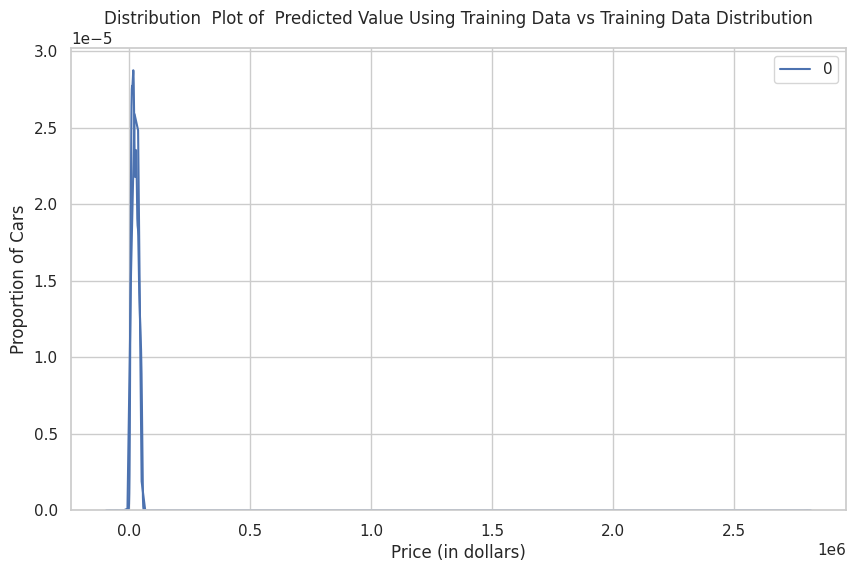

In [ ]:
#Lets visualize the model performance
import matplotlib.pyplot as plt
%matplotlib inline
#First go for distribution plot on Training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, ypipe2_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
data_test = pd.read_csv("test.csv")

In [ ]:
#replace dash and not supported values in fuel_type with 'Electric'
data_test['fuel_type'].replace('–', 'Electric', inplace = True)

In [ ]:
#replace not supported in fuel_type with 'Electric'
data_test['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [ ]:
data_test["fuel_type"].value_counts()

fuel_type
Gasoline          33033
Hybrid             1112
E85 Flex Fuel      1018
Diesel              671
Electric            201
Plug-In Hybrid      148
Name: count, dtype: int64

In [ ]:
#Drop the rows with null values in clean_title and accident column
data_test.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

In [ ]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes_test(engine_str_test):
    horsepower_test = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str_test)
    displacement_test = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str_test)
    engine_type_test = re.search(r'\d+\.\d+L ([\w\s]+Engine)', engine_str_test)
    return horsepower_test.group(1) if horsepower_test else '',\
           displacement_test.group(1) if displacement_test else '',\
           engine_type_test.group(1) if engine_type_test else ''

# Apply the function to create new columns
data_test[['Horsepower', 'Engine_Displacement', 'Engine_Type']] = data_test['engine'].apply(extract_engine_attributes_test).apply(pd.Series)

In [ ]:
data_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Horsepower,Engine_Displacement,Engine_Type
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,302.0,3.5L,V6 Cylinder Engine
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5L,V6 Cylinder Engine
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,241.0,2.0L,4 Cylinder Engine
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,518.0,5.0L,8 Cylinder Engine
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,335.0,3.0L,Straight 6 Cylinder Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes,420.0,6.2L,8 Cylinder Engine
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,295.0,5.3L,8 Cylinder Engine
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes,132.0,1.8L,4 Cylinder Engine
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes,450.0,3.5L,V6 Cylinder Engine


In [ ]:
data_test['Horsepower'].isnull().sum()

2365

In [ ]:
#convert dtype of Horsepower to float
data_test['Horsepower'] = pd.to_numeric(data_test['Horsepower'], errors = 'coerce')
data_test['Horsepower'].dtype

dtype('float64')

In [ ]:
data_test["Engine_Type"].value_counts()

Engine_Type
8 Cylinder Engine             10992
V6 Cylinder Engine            10569
4 Cylinder Engine              6962
Straight 6 Cylinder Engine     3382
                               2721
Flat 6 Cylinder Engine         1019
12 Cylinder Engine              231
5 Cylinder Engine               137
10 Cylinder Engine              136
3 Cylinder Engine                34
Name: count, dtype: int64

In [ ]:
#replace not supported in fuel_type with 'Electric'
data_test['Engine_Type'].replace('', 'Not Mentioned', inplace = True)

In [ ]:
data_test["Engine_Type"].value_counts()

Engine_Type
8 Cylinder Engine             10992
V6 Cylinder Engine            10569
4 Cylinder Engine              6962
Straight 6 Cylinder Engine     3382
Not Mentioned                  2721
Flat 6 Cylinder Engine         1019
12 Cylinder Engine              231
5 Cylinder Engine               137
10 Cylinder Engine              136
3 Cylinder Engine                34
Name: count, dtype: int64

In [ ]:
#using group by to fill in the values of the horse power with NaN values
data_test['Horsepower'].fillna(data_test.groupby('Engine_Type')['Horsepower'].transform("mean"), inplace = True)

In [ ]:
#strip the L from Engine_Displacement
data_test['Engine_Displacement'] = data_test['Engine_Displacement'].str.replace('L', '')

In [ ]:
#Change the dtype of Engine_Displacement to numeric
data_test['Engine_Displacement'] = pd.to_numeric(data_test['Engine_Displacement'], errors = 'coerce')

In [ ]:
#using group by to fill in the values of the Engine Displacement with NaN values
data_test['Engine_Displacement'].fillna(data_test.groupby('Engine_Type')['Engine_Displacement'].transform("mean"), inplace = True)

In [ ]:
data_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Horsepower,Engine_Displacement,Engine_Type
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,302.0,3.5,V6 Cylinder Engine
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5,V6 Cylinder Engine
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,241.0,2.0,4 Cylinder Engine
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,518.0,5.0,8 Cylinder Engine
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,335.0,3.0,Straight 6 Cylinder Engine


In [ ]:
#drop engine column
data_test.drop('engine', axis = 1, inplace = True)

In [ ]:
#subtract the values in model_year from 2023 to get the age of the car
data_test['age'] = 2024 - data_test['model_year']

In [ ]:
data_test['age'].value_counts()

age
6     3149
8     3081
7     2748
5     2633
4     2534
3     2532
9     2422
2     2081
10    2003
11    1770
12    1476
13    1406
1     1269
16    1117
14    1066
17    1056
15     626
19     614
18     591
20     477
21     377
22     286
23     284
24     145
25     127
26      82
27      54
28      51
0       42
29      30
30      26
31      21
32       6
50       1
Name: count, dtype: int64

In [ ]:
data_test

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Horsepower,Engine_Displacement,Engine_Type,age
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,A/T,White,Beige,None reported,Yes,302.0,3.5,V6 Cylinder Engine,10
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5,V6 Cylinder Engine,9
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,7-Speed A/T,Blue,White,None reported,Yes,241.0,2.0,4 Cylinder Engine,9
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,518.0,5.0,8 Cylinder Engine,6
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,335.0,3.0,Straight 6 Cylinder Engine,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,10-Speed A/T,Gray,Black,None reported,Yes,420.0,6.2,8 Cylinder Engine,5
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,295.0,5.3,8 Cylinder Engine,20
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,5-Speed M/T,Beige,Gray,None reported,Yes,132.0,1.8,4 Cylinder Engine,13
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,10-Speed A/T,Black,Orange,None reported,Yes,450.0,3.5,V6 Cylinder Engine,5


In [ ]:
#drop model_year column
data_test.drop('model_year', axis = 1, inplace = True)

In [ ]:
data['transmission'].value_counts()

transmission
A/T                                                   14905
6-Speed A/T                                            5626
8-Speed A/T                                            5198
Transmission w/Dual Shift Mode                         4737
6-Speed M/T                                            3232
7-Speed A/T                                            2475
10-Speed A/T                                           1262
5-Speed A/T                                            1155
8-Speed Automatic                                       887
4-Speed A/T                                             736
5-Speed M/T                                             704
CVT Transmission                                        669
9-Speed A/T                                             665
6-Speed Automatic                                       474
10-Speed Automatic                                      436
M/T                                                     332
Automatic                  

In [ ]:
# Encode the categorical data
data_test['fuel_type_target'] = encoder.fit_transform(data_test['fuel_type'])
data_test['transmission_target'] = encoder.fit_transform(data_test['transmission'])
data_test['brand_target'] = encoder.fit_transform(data_test['brand'])
data_test['Engine_Type_target'] = encoder.fit_transform(data_test['Engine_Type'])
data_test['model_target'] = encoder.fit_transform(data_test['model'])

In [ ]:
data_test.head()


,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Horsepower,Engine_Displacement,Engine_Type,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,54273,Mercedes-Benz,E-Class E 350,73000,Gasoline,A/T,White,Beige,None reported,Yes,302.0,3.5,V6 Cylinder Engine,10,3,33,34,9,528
1,54274,Lexus,RX 350 Base,128032,Gasoline,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5,V6 Cylinder Engine,9,3,26,26,9,1246
2,54275,Mercedes-Benz,C-Class C 300,51983,Gasoline,7-Speed A/T,Blue,White,None reported,Yes,241.0,2.0,4 Cylinder Engine,9,3,20,34,3,317
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,29500,Gasoline,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,518.0,5.0,8 Cylinder Engine,6,3,42,25,5,1318
4,54277,BMW,X6 xDrive40i,90000,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,335.0,3.0,Straight 6 Cylinder Engine,4,3,26,4,8,1710


In [ ]:
#drop ext_col and int_col
data_test.drop(['id', 'ext_col', 'int_col','brand','model', 'fuel_type','transmission','accident'], axis = 1, inplace = True)


In [ ]:
data_test.head()

,milage,clean_title,Horsepower,Engine_Displacement,Engine_Type,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,73000,Yes,302.0,3.5,V6 Cylinder Engine,10,3,33,34,9,528
1,128032,Yes,275.0,3.5,V6 Cylinder Engine,9,3,26,26,9,1246
2,51983,Yes,241.0,2.0,4 Cylinder Engine,9,3,20,34,3,317
3,29500,Yes,518.0,5.0,8 Cylinder Engine,6,3,42,25,5,1318
4,90000,Yes,335.0,3.0,Straight 6 Cylinder Engine,4,3,26,4,8,1710


In [ ]:
#drop ext_col and int_col
data_test.drop(['Engine_Type'], axis = 1, inplace = True)


In [ ]:
data_test.head()

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,73000,Yes,302.0,3.5,10,3,33,34,9,528
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246
2,51983,Yes,241.0,2.0,9,3,20,34,3,317
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710


In [ ]:
data_test.shape

(36183, 10)

In [ ]:
#define Z as the input
Z_test = data_test[['transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement','model_target']]
Z_test.head()

,transmission_target,age,milage,Horsepower,Engine_Displacement,model_target
0,33,10,73000,302.0,3.5,528
1,26,9,128032,275.0,3.5,1246
2,20,9,51983,241.0,2.0,317
3,42,6,29500,518.0,5.0,1318
4,26,4,90000,335.0,3.0,1710


In [ ]:
#fit transform Z
data_test_pr = pr.fit_transform(Z_test)

In [ ]:
data_test_pr.shape

(36183, 84)

In [ ]:
# Get predictions from your model using the scaled data
y_pred_test = pipe.predict(data_test_pr)

In [ ]:
data_test['price'] = y_pred_test

In [ ]:
data_test.head()

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target,price
0,73000,Yes,302.0,3.5,10,3,33,34,9,528,21165.441406
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246,18539.074219
2,51983,Yes,241.0,2.0,9,3,20,34,3,317,25051.652344
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318,38498.011719
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710,32469.089844


In [ ]:
# Apply to_numeric to convert the price column, specifying errors='coerce' to handle potential conversion issues
data_test['price'] = pd.to_numeric(data_test['price'], errors='coerce')

In [ ]:
data_test

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target,price
0,73000,Yes,302.0,3.5,10,3,33,34,9,528,21165.441406
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246,18539.074219
2,51983,Yes,241.0,2.0,9,3,20,34,3,317,25051.652344
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318,38498.011719
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710,32469.089844
...,...,...,...,...,...,...,...,...,...,...,...
36178,4500,Yes,420.0,6.2,5,3,2,15,5,1763,35573.085938
36179,185000,Yes,295.0,5.3,20,3,7,9,5,1481,10593.320312
36180,116000,Yes,132.0,1.8,13,3,11,49,3,480,10985.167969
36181,39000,Yes,450.0,3.5,5,3,2,27,9,1082,41711.210938


In [ ]:
data_submit = pd.read_csv("test.csv")

In [ ]:
data_submit

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes


In [ ]:
data_submit['price'] = y_pred_test

In [ ]:
# Apply to_numeric to convert the price column, specifying errors='coerce' to handle potential conversion issues
data_submit['price'] = pd.to_numeric(data_submit['price'], errors='coerce')

In [ ]:
data_submit

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,21165.441406
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,18539.074219
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,25051.652344
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,38498.011719
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,32469.089844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes,35573.085938
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,10593.320312
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes,10985.167969
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes,41711.210938


In [ ]:
data_submit[['id','price']].to_csv('price_submission_02.csv', index=False)

In [ ]:
data_test

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target,price
0,73000,Yes,302.0,3.5,10,3,33,34,9,528,21165.441406
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246,18539.074219
2,51983,Yes,241.0,2.0,9,3,20,34,3,317,25051.652344
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318,38498.011719
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710,32469.089844
...,...,...,...,...,...,...,...,...,...,...,...
36178,4500,Yes,420.0,6.2,5,3,2,15,5,1763,35573.085938
36179,185000,Yes,295.0,5.3,20,3,7,9,5,1481,10593.320312
36180,116000,Yes,132.0,1.8,13,3,11,49,3,480,10985.167969
36181,39000,Yes,450.0,3.5,5,3,2,27,9,1082,41711.210938


In [ ]:
#drop ext_col and int_col
data_test.drop(['price'], axis = 1, inplace = True)

In [ ]:
data_test

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,73000,Yes,302.0,3.5,10,3,33,34,9,528
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246
2,51983,Yes,241.0,2.0,9,3,20,34,3,317
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710
...,...,...,...,...,...,...,...,...,...,...
36178,4500,Yes,420.0,6.2,5,3,2,15,5,1763
36179,185000,Yes,295.0,5.3,20,3,7,9,5,1481
36180,116000,Yes,132.0,1.8,13,3,11,49,3,480
36181,39000,Yes,450.0,3.5,5,3,2,27,9,1082


In [ ]:
x2 = data_test



In [ ]:
x2.head()

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target
0,73000,Yes,302.0,3.5,10,3,33,34,9,528
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246
2,51983,Yes,241.0,2.0,9,3,20,34,3,317
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710


In [ ]:
x2 = x2.drop(columns= ['clean_title','fuel_type_target','brand_target','Engine_Type_target'])

In [ ]:
x2 = scaler.fit_transform(x2)

In [ ]:
y_pred_test2 =  xgb.predict(x2)

In [ ]:
data_test['price'] = y_pred_test2

In [ ]:
data_test.head()

,milage,clean_title,Horsepower,Engine_Displacement,age,fuel_type_target,transmission_target,brand_target,Engine_Type_target,model_target,price
0,73000,Yes,302.0,3.5,10,3,33,34,9,528,17345.287519
1,128032,Yes,275.0,3.5,9,3,26,26,9,1246,16856.524121
2,51983,Yes,241.0,2.0,9,3,20,34,3,317,22463.712402
3,29500,Yes,518.0,5.0,6,3,42,25,5,1318,35540.219384
4,90000,Yes,335.0,3.0,4,3,26,4,8,1710,31270.859458


In [ ]:
data_submit_2 = pd.read_csv("test.csv")

In [ ]:
data_submit_2['price'] = y_pred_test2

In [ ]:
data_submit_2

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,17345.287519
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,16856.524121
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,22463.712402
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,35540.219384
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,31270.859458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes,39266.552741
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,12216.826802
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes,8870.593587
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes,36447.972655


In [ ]:
data_submit_2[['id','price']].to_csv('price_submission4.csv', index=False)